In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# New datasets

## Mobile robot

The data is stored in three text files: one file for experiences in which the Pioneer was moving in a straight line, one in which it was turning in place, and one in which it was raising or lowering its gripper.

The description variable is a string of symbols. The string breaks down as follows:

"u" or "o" - unobstructed or obstructed\
"x.xs" - activity lasted x.x seconds\
activity - the activity and speed, if applicable, i.e. move100 = move forward at 100mm/sec\
visual - objects in the visual array are listed in sequence. "cAHEAD" indicates an object visible to channel c directly AHEAD of the Pioneer.\
\[visual.X\] - visual descriptions followed by a '.' and one character indicate that something special happens with the visible object. .V means the object Vanishes from sight during the activity. .D indicates that the object is Discovered (becomes visible) during the activity. .P indicates that the object is pushed.

An example: "u-3.5s-retr-100-aRIGHT.D" An unobstructed retreat (move) at -100 mm/sec for 3.5 seconds with an object being discovered in channel A. 

There are 102 move experiences, 42 turn experiences, 16 gripper experiences.

**Clustering task:** cluster the time series according to the 3 different experiences (move, gripper, turn).

In [48]:
path = 'datasets/pioneers/'

In [49]:
data_pd = pd.read_csv(path+'MOVE.DATA', sep=',', engine='python', header=None)
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,MOVE-TRIALT148,u-3.5s-retr-250-cAHEAD,1525.0,11.8,345.6,1276.0,1636.0,808.0,445.0,459.0,...,0.0,0.0,10000.0,140.0,0.0,0.0,0.0,10000.0,140.0,0.0
1,MOVE-TRIALT148,u-3.5s-retr-250-cAHEAD,1525.1,11.8,345.6,1276.0,1636.0,808.0,452.0,452.0,...,5.0,0.0,223.5,-102.0,188.0,0.0,0.0,10000.0,140.0,0.0
2,MOVE-TRIALT148,u-3.5s-retr-250-cAHEAD,1525.2,11.8,345.6,1276.0,1629.0,815.0,452.0,452.0,...,5.0,1.0,263.8,-86.0,169.0,0.0,0.0,10000.0,140.0,0.0
3,MOVE-TRIALT148,u-3.5s-retr-250-cAHEAD,1525.3,11.8,345.6,1276.0,1629.0,815.0,452.0,452.0,...,0.0,0.0,10000.0,140.0,0.0,0.0,0.0,10000.0,140.0,0.0
4,MOVE-TRIALT148,u-3.5s-retr-250-cAHEAD,1525.4,11.8,345.6,1276.0,1629.0,811.0,452.0,459.0,...,0.0,0.0,10000.0,140.0,0.0,0.0,0.0,10000.0,140.0,0.0


In [50]:
exp_names = np.unique(data_pd[0])

data_pioneers0 = list()
for i in range(exp_names.shape[0]):
    exp_n = data_pd[data_pd[0]==exp_names[i]]
    exp_n = exp_n.drop(columns=[0,1,2])
    data_pioneers0.append(exp_n.to_numpy())

#label 0: MOVE experience
labels_MOVE = np.zeros(len(data_pioneers0))
data_pioneers0[0]

array([[   12.7,   356.5,  1264. , ...,   966.4,    95. ,    71. ],
       [   12.7,   356.5,  1275. , ...,   966.4,    94. ,    71. ],
       [   12.7,   356.5,  1275. , ..., 10000. ,   140. ,     0. ],
       ...,
       [   12.7,   358.6,  1284. , ..., 10000. ,   140. ,     0. ],
       [   12.7,   358.6,  1285. , ..., 10000. ,   140. ,     0. ],
       [   12.7,   358.6,  1285. , ..., 10000. ,   140. ,     0. ]])

In [60]:
data_pd = pd.read_csv(path+'GRIPPER.DATA', sep=',', engine='python', header=None)
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,GRIPPER-TRIALT176,gripper-UP[DOWN]--cAHEAD,693.3,12.4,5.3,1466.0,5201.0,204.0,203.0,206.0,...,6.0,20.0,3621.9,13.0,23.0,5.0,4.0,418.8,-97.0,125.0
1,GRIPPER-TRIALT176,gripper-UP[DOWN]--cAHEAD,693.4,12.4,5.3,1466.0,5201.0,196.0,212.0,206.0,...,6.0,19.0,3535.7,13.0,24.0,5.0,5.0,421.4,-97.0,124.0
2,GRIPPER-TRIALT176,gripper-UP[DOWN]--cAHEAD,693.5,12.4,5.3,1466.0,5201.0,196.0,212.0,206.0,...,6.0,20.0,3452.9,13.0,24.0,6.0,3.0,421.4,-97.0,125.0
3,GRIPPER-TRIALT176,gripper-UP[DOWN]--cAHEAD,693.6,12.4,5.3,1466.0,5201.0,196.0,196.0,206.0,...,6.0,21.0,3373.1,12.0,24.0,5.0,4.0,418.8,-97.0,125.0
4,GRIPPER-TRIALT176,gripper-UP[DOWN]--cAHEAD,693.7,12.4,5.3,1466.0,5201.0,203.0,196.0,206.0,...,6.0,20.0,3452.9,13.0,24.0,5.0,4.0,418.8,-97.0,125.0


In [61]:
exp_names = np.unique(data_pd[0])

data_pioneers1 = list()
for i in range(exp_names.shape[0]):
    exp_n = data_pd[data_pd[0]==exp_names[i]]
    exp_n = exp_n.drop(columns=[0,1,2])
    data_pioneers1.append(exp_n.to_numpy())

#label 1: GRIPPER experience
labels_GRIP = np.ones(len(data_pioneers1))
labels = np.concatenate((labels_MOVE,labels_GRIP))
data_pioneers = data_pioneers0 + data_pioneers1
data_pioneers1[0]

array([[   12.1,     0. ,  1477. , ..., 10000. ,   140. ,     0. ],
       [   12.1,     0. ,  1477. , ..., 10000. ,   140. ,     0. ],
       [   12.1,     0. ,  1477. , ..., 10000. ,   140. ,     0. ],
       ...,
       [   12.4,     0. ,  1477. , ..., 10000. ,   140. ,     0. ],
       [   12.4,     0. ,  1477. , ..., 10000. ,   140. ,     0. ],
       [   12.4,     0. ,  1477. , ..., 10000. ,   140. ,     0. ]])

In [64]:
data_pd = pd.read_csv(path+'TURN.DATA', sep=',', engine='python', header=None)
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,TURN-TRIALT168,o-3.0s-turn100-cRIGHT,1620.9,11.8,234.1,1685.0,5201.0,5201.0,2104.0,5201.0,...,7.0,0.0,153.2,-10.0,238.0,8.0,2.0,1165.7,-70.0,66.0
1,TURN-TRIALT168,o-3.0s-turn100-cRIGHT,1621.0,11.8,234.1,1685.0,5201.0,5201.0,2104.0,5201.0,...,0.0,0.0,10000.0,140.0,0.0,11.0,8.0,1165.7,-74.0,63.0
2,TURN-TRIALT168,o-3.0s-turn100-cRIGHT,1621.1,11.8,234.1,1685.0,5201.0,5201.0,2104.0,5201.0,...,0.0,0.0,10000.0,140.0,0.0,14.0,7.0,1409.7,-63.0,56.0
3,TURN-TRIALT168,o-3.0s-turn100-cRIGHT,1621.2,11.8,234.1,1685.0,5201.0,5201.0,2104.0,5201.0,...,0.0,0.0,10000.0,140.0,0.0,15.0,7.0,1302.9,-62.0,59.0
4,TURN-TRIALT168,o-3.0s-turn100-cRIGHT,1621.3,11.8,234.1,1685.0,5201.0,5201.0,2104.0,5201.0,...,0.0,0.0,10000.0,140.0,0.0,22.0,6.0,1390.9,-66.0,57.0


**numpy data:** data_pioneers

**clusters:** labels

In [65]:
exp_names = np.unique(data_pd[0])

data_pioneers2 = list()
for i in range(exp_names.shape[0]):
    exp_n = data_pd[data_pd[0]==exp_names[i]]
    exp_n = exp_n.drop(columns=[0,1,2])
    data_pioneers2.append(exp_n.to_numpy())

#label 2: TURN experience
labels_TURN = np.ones(len(data_pioneers2))*2
#final list of labels
labels = np.concatenate((labels,labels_TURN))
#final list of data
data_pioneers = data_pioneers + data_pioneers2
data_pioneers2[0]

array([[   11.7,   357.9,  2031. , ..., 10000. ,   140. ,     0. ],
       [   12. ,   357.9,  2031. , ..., 10000. ,   140. ,     0. ],
       [   12. ,   357.9,  2024. , ..., 10000. ,   140. ,     0. ],
       ...,
       [   11.7,   192.3,   908. , ..., 10000. ,   140. ,     0. ],
       [   11.7,   195.8,   908. , ...,  4711.5,    30. ,    28. ],
       [   11.7,   199.3,   905. , ..., 10000. ,   140. ,     0. ]])

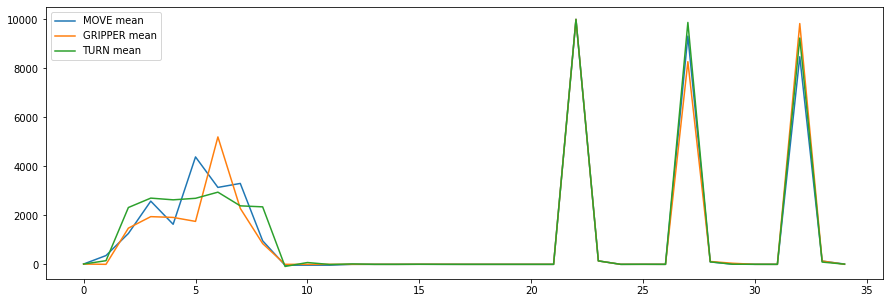

In [74]:
ax = plt.figure(figsize =(15,5))
plt.plot(np.mean(data_pioneers0[0][:], axis=0).T, label='MOVE mean')
plt.plot(np.mean(data_pioneers1[0][:], axis=0).T, label='GRIPPER mean')
plt.plot(np.mean(data_pioneers2[0][:], axis=0).T, label='TURN mean')
plt.legend()

## Activity recognition


Dataset summary:\
#Activities: 33\
#Sensors: 9\
#Subjects: 17\
#Scenarios: 3 

The first to columns correspond to the timestamp while the last column corresponds to the
activity label.

ACTIVITY SET:\
A1: Walking\
A2: Jogging\
A3: Running\
A4: Jump up\
A5: Jump front & back\
A6: Jump sideways\
A7: Jump leg/arms open/closed\
A8: Jump rope\
A9: Trunk twist (arms outstretched)\
A10: Trunk twist (elbows bent)\
A11: Waist bends forward\
A12: Waist rotation\
A13: Waist bends (reach foot with opposite hand)\
A14: Reach heels backwards\
A15: Lateral bend (10_ to the left + 10_ to the right)\
A16: Lateral bend with arm up (10_ to the left + 10_ to the right)\
A17: Repetitive forward stretching\
A18: Upper trunk and lower body opposite twist\
A19: Lateral elevation of arms\
A20: Frontal elevation of arms\
A21: Frontal hand claps\
A22: Frontal crossing of arms\
A23: Shoulders high-amplitude rotation\
A24: Shoulders low-amplitude rotation\
A25: Arms inner rotation\
A26: Knees (alternating) to the breast\
A27: Heels (alternating) to the backside\
A28: Knees bending (crouching)\
A29: Knees (alternating) bending forward\
A30: Rotation on the knees\
A31: Rowing\
A32: Elliptical bike\
A33: Cycling 

The rows of the log file correspond to the consecutive samples of the mesurments sampled at 50 Hz. Each log file contains 120 columns.

The columns in between the 3rd and 119th column correspond to the sensor
measurements. There are 9 sensors in total with 13 modalities each.

**Clustering task:** cluster the data according to the different activities (33 clusters).

In [2]:
path = 'datasets/activity_recognition/realistic_sensor_displacement/'
files = os.listdir(path)

**numpy data:** data_activities

**clusters:** labels

In [27]:
#à voir si on l'utilise, les fichiers sont très gros, on peut peut-être en prendre qu'une partie
files_subset = files[:3]

labels = list()
data_activity = list()
for f in files_subset:
    if '.log' in f:
        data_pd = pd.read_csv(path+f, sep='\t', engine='python', header=None)
        classes = data_pd[119]
        i=0
        while i < (len(classes)-1):
            start = i
            end = i
            d = list()
            labels.append(classes[i])
            while classes[i]==classes[i+1]:
                i += 1
                end = i
                if i==(len(classes)-1):
                    d.append(data_pd.iloc[start:end].drop(columns=[0,119]).to_numpy())
                    break
            d.append(data_pd.iloc[start:end].drop(columns=[0,119]).to_numpy())
            i +=1
            data_activity.append(d)


In [39]:
labels = np.array(labels)

data_activities = list()
for i in range(len(data_activity)):
    data_activities.append(data_activity[i][0])

## Gas sensors

100 recordings of a sensor array under different conditions in a home setting: background, wine and banana presentations. The array includes 8 MOX gas sensors, and humidity and temperature sensors.

This dataset contains a set of time series from three different conditions: wine, banana and background activity. There are 36 inductions with wine, 33 with banana and 31 recordings of background activity. One possible application is to discriminate among background, wine and banana.

For each induction, we include one hour of background activity prior to and after the stimulus presentation. Time series were recorded at one sample per second, with minor variations at some data points due to issues in the wireless communication.

**Clustering task:** cluster the data according to the 3 different conditions (background, wine, banana).

In [75]:
path = 'datasets/wine_banana/HT_Sensor_UCIsubmission/'

In [76]:
metadata_pd = pd.read_csv(path+'HT_Sensor_metadata.dat', sep='\t', usecols=[0,2],
                          names=['id','class'], engine='python', skiprows=[0])
metadata_pd.head()

,id,class
0,0,banana
1,1,wine
2,2,wine
3,3,banana
4,4,wine


**numpy data:** data_gas

**clusters:** labels

In [77]:
name = metadata_pd['class']

name_unique = list(np.unique(name))
dict_name = dict(zip(name_unique, list(range(len(name_unique)))))

labels = np.array([dict_name.get(nom) for nom in name])

In [78]:
data_pd = pd.read_csv(path+'HT_Sensor_dataset.dat', sep='  ', engine='python', skiprows=[0], header=None)

data_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [79]:
ids = metadata_pd['id']
data_gas = list()

for i in range(ids.shape[0]):
    data_id = data_pd[data_pd[0]==ids[i]]
    data_id = data_id.drop(columns=[0])
    data_id = data_id[data_id[1] >= 0]
    data_gas.append(data_id.to_numpy())

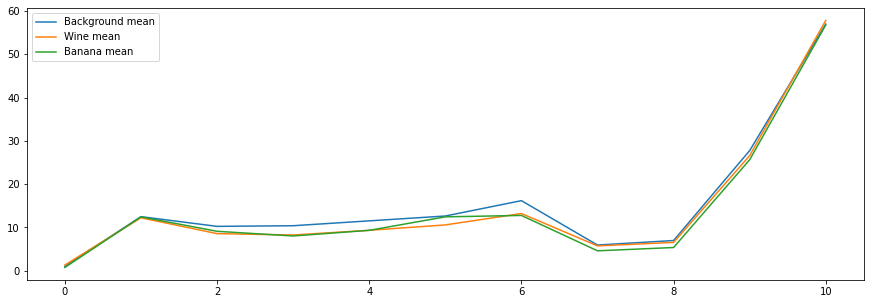

In [96]:
data_back = list()
for i in np.where(labels==0)[0]:
    data_back.append(data_gas[i])
mean_back = np.mean(data_back[0][:], axis=0).T
    
data_wine = list()
for i in np.where(labels==1)[0]:
    data_wine.append(data_gas[i])
mean_wine = np.mean(data_wine[0][:], axis=0).T
    
data_banana = list()
for i in np.where(labels==2)[0]:
    data_banana.append(data_gas[i])
mean_banana = np.mean(data_banana[0][:], axis=0).T


ax = plt.figure(figsize =(15,5))
plt.plot(np.mean(data_back[0][:], axis=0).T, label='Background mean')
plt.plot(np.mean(data_wine[0][:], axis=0).T, label='Wine mean')
plt.plot(np.mean(data_banana[0][:], axis=0).T, label='Banana mean')
plt.legend()

En comparant les deux plots des deux datasets à trois clusters on peut avoir une intuition de pourquoi les performances de clustering sont meilleurs sur le dataset de Mobile Robot. En effet on peut voir que les troix moyennes correspondant aux trois clusters se distinguent bien moins facilement les unes des autres sur ce dataset des gas sensors.

## Sign language

Samples from a single signer (a native Auslan signer) were collected over a period of nine weeks. In total, 27 samples per sign, and a total of 2565 signs were collected. The average length of each sign was approximately 57 frames. 

The file consists of 9 subdirectories tctodd1-9. Each directory consists of 3 samples of each sign, captured on a different day. In total there are 95 different signs, with 27 samples per sign. Signs were provided by a native signer volunteer.

Each file consists of a sequence of lines. Each line consists of 22 whitespace-separated numbers representing the 22 channels of information. The list of channels can be found in the domain description file. It also lists the classes.

The following data were recorded for each hand:

x position expressed relative to a zero point set slightly below the chin. Expressed in meters.\
y position expressed relative to a zero point set slightly below the chin. Expressed in meters.\
z position expressed relative to a zero point set slightly below the chin. Expressed in meters.\
roll expressed as a value between -0.5 and 0.5 with 0 being palm down. Positive means the palm is rolled clockwise from the perspective of the signer. To get degrees, multiply by 180.\
pitch expressed as a value between -0.5 and 0.5 with 0 being palm flat (horizontal). Positive means the palm is pointing up. To get degrees, multiply by 180.\
yaw expressed a value between -1.0 and 1.0 with 0 being palm straight ahead from the perspective of the signer.\ Positive means clockwise from the perspective above the signer. To get degrees, multiply by 180.\
Thumb bend measure between 0 and 1. 0 means totally flat, 1 means totally bent. However, the finger bend measurements are not very exact.\
Forefinger bend measure between 0 and 1. 0 means totally flat, 1 means totally bent. However, the finger bend measurements are not very exact.\
Middle finger bend measure between 0 and 1. 0 means totally flat, 1 means totally bent. However, the finger bend measurements are not very exact.\
Ring finger bend measure between 0 and 1. 0 means totally flat, 1 means totally bent. However, the finger bend measurements are not very exact.\
Little finger bend measure between 0 and 1. 0 means totally flat, 1 means totally bent. However, the finger bend measurements are not very exact.


**Clustering task:** cluster the data according to the sign (95 clusters).


In [171]:
path = 'datasets/sign_language/tctodd/'

#list of lists, of all files per directory
directories = os.listdir(path)
directories = np.sort(directories)
files = list()
for direc in directories:
    f=os.listdir(path+direc)
    f = np.sort(f)
    f = [path+direc+'/'+name for name in f]
    files.append(f)

In [172]:
nb_signs = 95
sample_per_sign_per_file = 3
signs = list()

#create list of lists, of samples per signs (95 signs, and 27 samples per sign)
for i in range(nb_signs):
    sample_per_sign = list()
    for l in range(len(files)):
        for j in range(sample_per_sign_per_file):
            sample_per_sign.append(files[l][i*3+j])
    signs.append(sample_per_sign)

In [158]:
signs[0] #one list in the list 'signs' corresponds to one sign

['datasets/sign_language/tctodd/tctodd1/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd1/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd1/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd2/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd2/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd2/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd3/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd3/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd3/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd4/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd4/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd4/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd5/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd5/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd5/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd6/God-1.tsd',
 'datasets/sign_language/tctodd/tctodd6/God-2.tsd',
 'datasets/sign_language/tctodd/tctodd6/God-3.tsd',
 'datasets/sign_language/tctodd/tctodd7/God-1.tsd',
 'datasets/s

In [173]:
data_pd = pd.read_csv(signs[0][0], sep='\t', engine='python', header=None)
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.064909,0.034318,-0.043964,0.626383,0.499976,0.506653,0.648993,1.0,0.949510,0.965124,...,0.073279,-0.024444,0.233232,0.560134,0.606738,0.685484,0.758431,1.0,0.754117,1.0
1,-0.033878,0.034764,-0.032445,0.647282,0.486303,0.480203,0.915143,1.0,0.915993,1.000000,...,0.065376,-0.009397,0.194742,0.585891,0.632960,1.000000,0.916470,1.0,0.974510,1.0
2,0.015014,0.030924,-0.012665,0.646525,0.478735,0.466018,0.993164,1.0,0.911142,1.000000,...,0.040059,-0.006763,0.183840,0.576174,0.662819,1.000000,0.999608,1.0,1.000000,1.0
3,0.019613,0.030433,-0.000207,0.643083,0.484130,0.464675,1.000000,1.0,0.940249,1.000000,...,0.035996,-0.004575,0.192532,0.571828,0.666005,1.000000,1.000000,1.0,1.000000,1.0
4,0.019479,0.057759,0.007249,0.646513,0.512036,0.459853,1.000000,1.0,0.960536,1.000000,...,0.099354,-0.020828,0.204154,0.586355,0.656374,1.000000,0.961176,1.0,1.000000,1.0


**numpy data:** data_signs

**clusters:** labels

In [174]:
data_signs = list()

for i in range(len(signs)):
    for j in range(27):
        sign = pd.read_csv(signs[i][j], sep='\t', engine='python', header=None)
        data_signs.append(sign.to_numpy())

In [161]:
signs_names = list()

for i in range(nb_signs):
    for k in range(27):
        signs_names.append(signs[i][0].split('/')[-1][:-6])

In [162]:
unique_names = np.unique(signs_names)

dict_name = dict(zip(unique_names, list(range(len(unique_names)))))

labels = np.array([dict_name.get(nom) for nom in signs_names])

# Dataset from paper

## Japanese vowels

This dataset records 640 time series of 12 LPC cepstrum coefficients taken from nine male speakers.
 
Nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, we applied 12-degree linear prediction analysis to it to obtain a discrete-time series with 12 LPC cepstrum coefficients. This means that one utterance by a speaker forms a time series whose length is in the range 7-29 and each point of a time series is of 12 features.


Sampling rate : 10kHz\
Frame length : 25.6 ms\
Shift length : 6.4ms\
Degree of LPC coefficients : 12 

Each speaker recorded several times the vowels, in different opportunities. There are between 24 and 88 records per speaker.

**Clustering task:** cluster the records for each of the 9 speakers.

In [3]:
path = 'datasets/japanese_vowel/'

In [25]:
f = open(path+'ae.train','r')
lines = f.readlines()
f.close()
lines = [l.strip(' \n').split(' ') for l in lines]

In [37]:
#storing the number of blocks per speaker in the list "count"
f = open(path+'size_ae.train', 'r')
count = f.readlines()
count = [int(c) for c in count[0].strip(' \n').split(' ')]
f.close()
labels = list()

for i in range(len(count)):
    labels += [i] * count[i]

In [45]:
data_vowels = list()

s = 0
for c in count:
    data = lines[s:s+c]
    s += c
    data = [[float(nb) for nb in d] for d in data]
    print(data)
    

ValueError: could not convert string to float: ''